In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("SF_Fires.csv")
df.head()

/var/folders/sl/1ftzfnc91ss9qh4_6dqh574h0000gn/T/ipykernel_92451/3000924406.py:1: DtypeWarning: Columns (10,12,13,20,38,45,46,55,59) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("SF_Fires.csv")


,Incident_Number,Exposure_Number,ID,Address,Incident_Date,Call_Number,Alarm_DtTm,Arrival_DtTm,Close_DtTm,City,...,Detector_Effectiveness,Detector_Failure_Reason,Automatic_Extinguishing_System_Present,Automatic_Extinguishing_Sytem_Type,Automatic_Extinguishing_Sytem_Perfomance,Automatic_Extinguishing_Sytem_Failure_Reason,Number_of_Sprinkler_Heads_Operating,Supervisor_District,neighborhood_district,point
0,8028304,0,80283040,150 Elsie St.,2008-04-01T00:00:00,80920257,2008-04-01T18:06:37,2008-04-01T18:15:19,2008-04-01T18:21:48,SF,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.0,Bernal Heights,POINT (-122.41837339 37.74208979)
1,8028303,0,80283030,85 Turner Tr.,2008-04-01T00:00:00,80920256,2008-04-01T18:00:52,2008-04-01T18:06:30,2008-04-01T18:22:18,SF,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Potrero Hill,POINT (-122.39489 37.756291)
2,8028309,0,80283090,175 6th St.,2008-04-01T00:00:00,80920262,2008-04-01T18:42:06,2008-04-01T18:45:23,2008-04-01T18:53:25,SF,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,South of Market,POINT (-122.407468 37.78008)
3,8028314,0,80283140,633 Hayes St.,2008-04-01T00:00:00,80920268,2008-04-01T19:03:52,2008-04-01T19:08:39,2008-04-01T19:35:36,SF,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,Hayes Valley,POINT (-122.42684908 37.77612642)
4,8028319,0,80283190,27th Av. / Cabrillo St.,2008-04-01T00:00:00,80920273,2008-04-01T19:16:12,2008-04-01T19:23:48,2008-04-01T19:28:49,SF,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Outer Richmond,POINT (-122.4863941 37.77428492)


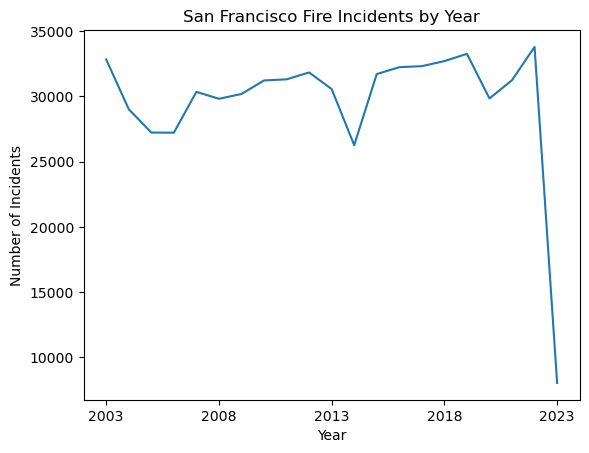

In [12]:
# Convert the Incident_Date column to a datetime object
df['Incident_Date'] = pd.to_datetime(df['Incident_Date'], format='%Y-%m-%dT%H:%M:%S')

# Create a new column with the year of each incident
df['Year'] = df['Incident_Date'].dt.year

# Group the data by year and count the number of incidents for each year
incidents_by_year = df.groupby('Year')['Incident_Date'].count()

# Create a line plot of the number of incidents by year
plt.plot(incidents_by_year.index, incidents_by_year.values)
plt.xlabel('Year')
plt.ylabel('Number of Incidents')
plt.title('San Francisco Fire Incidents by Year')
plt.xticks(range(incidents_by_year.index.min(), incidents_by_year.index.max()+1, 5))
plt.show()


In [5]:
# Split the Primary_Situation column into two columns: Code and Description
split_col = df['Primary_Situation'].str.split(' - ', expand=True)
split_col.columns = ['Primary_Situation','Code', 'Description']

# Concatenate the original DataFrame and the new split columns
df = pd.concat([df, split_col], axis=1)


df.head()

,Incident_Number,Exposure_Number,ID,Address,Incident_Date,Call_Number,Alarm_DtTm,Arrival_DtTm,Close_DtTm,City,...,Automatic_Extinguishing_Sytem_Perfomance,Automatic_Extinguishing_Sytem_Failure_Reason,Number_of_Sprinkler_Heads_Operating,Supervisor_District,neighborhood_district,point,Year,Primary_Situation,Code,Description
0,8028304,0,80283040,150 Elsie St.,2008-04-01,80920257,2008-04-01T18:06:37,2008-04-01T18:15:19,2008-04-01T18:21:48,SF,...,NaN,NaN,NaN,9.0,Bernal Heights,POINT (-122.41837339 37.74208979),2008,412,Gas leak (natural gas or LPG),None
1,8028303,0,80283030,85 Turner Tr.,2008-04-01,80920256,2008-04-01T18:00:52,2008-04-01T18:06:30,2008-04-01T18:22:18,SF,...,NaN,NaN,NaN,NaN,Potrero Hill,POINT (-122.39489 37.756291),2008,552,Police matter,None
2,8028309,0,80283090,175 6th St.,2008-04-01,80920262,2008-04-01T18:42:06,2008-04-01T18:45:23,2008-04-01T18:53:25,SF,...,NaN,NaN,NaN,NaN,South of Market,POINT (-122.407468 37.78008),2008,210,"Steam Rupture, steam, other",None
3,8028314,0,80283140,633 Hayes St.,2008-04-01,80920268,2008-04-01T19:03:52,2008-04-01T19:08:39,2008-04-01T19:35:36,SF,...,NaN,NaN,NaN,5.0,Hayes Valley,POINT (-122.42684908 37.77612642),2008,522,Water or steam leak,None
4,8028319,0,80283190,27th Av. / Cabrillo St.,2008-04-01,80920273,2008-04-01T19:16:12,2008-04-01T19:23:48,2008-04-01T19:28:49,SF,...,NaN,NaN,NaN,NaN,Outer Richmond,POINT (-122.4863941 37.77428492),2008,520,"Water problem, other",None


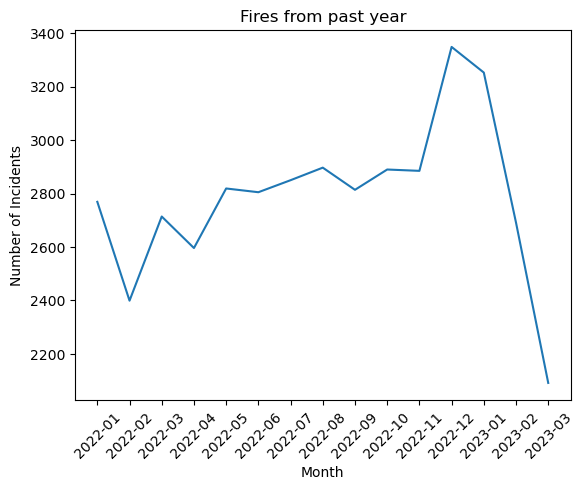

In [17]:
# filter the data for the period between 2022 and March 2023
incidents_subset = df[(df['Year'] >= 2022) & (df['Incident_Date'] < '2023-04-01')]

# group the subset by month and count the number of incidents for each month
incidents_by_month = incidents_subset.groupby(incidents_subset['Incident_Date'].dt.strftime('%Y-%m'))['Incident_Date'].count()

# create a line plot of the number of incidents by month
plt.plot(incidents_by_month.index, incidents_by_month.values)
plt.xlabel('Month')
plt.ylabel('Number of Incidents')
plt.title('Fires from past year')
plt.xticks(rotation=45)
plt.show()

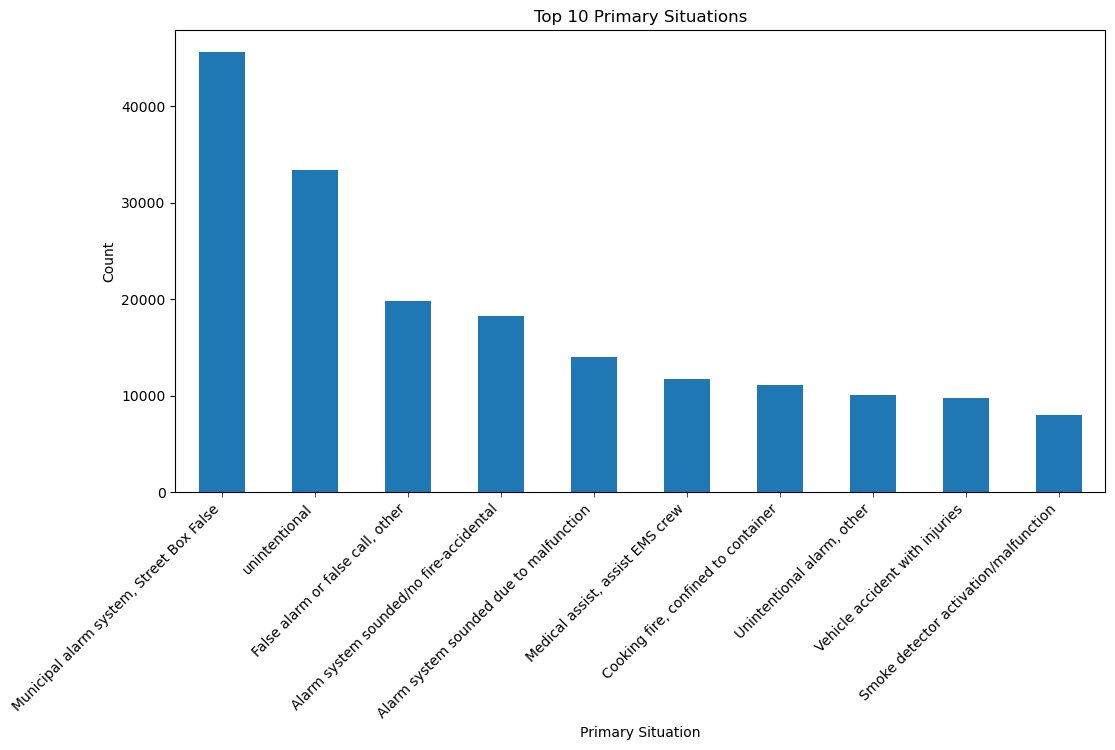

In [18]:
df['Year'] = pd.to_datetime(df['Year'], format='%Y')
df_filtered = df[df['Year'].dt.year > 2003]
counts = df_filtered.groupby('Code').count()
top = counts['Year'].sort_values(ascending=False).head(10)

fig, ax = plt.subplots(figsize=(12, 6))
top.plot(kind='bar', ax=ax)

ax.set_xlabel('Primary Situation')
ax.set_ylabel('Count')
ax.set_title('Top 10 Primary Situations')

ax.set_xticklabels(top.index, rotation=45, ha='right')
ax.xaxis.set_tick_params(width=0.5)

plt.show()

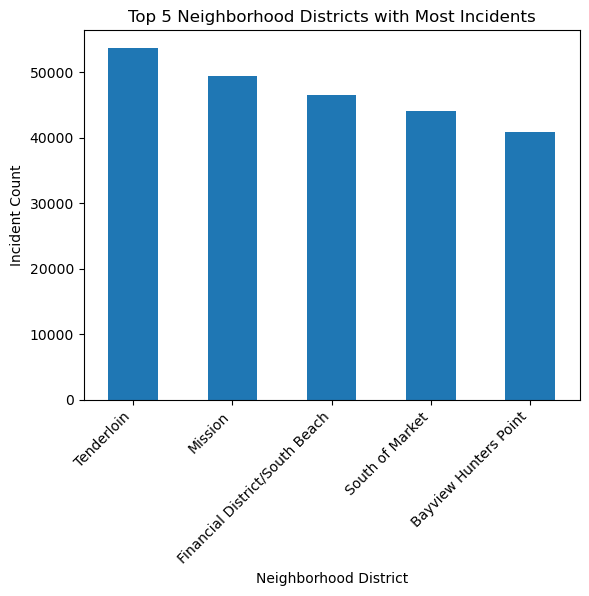

In [19]:
df['Year'] = pd.to_datetime(df['Year'], format='%Y')
df_filtered = df[df['Year'].dt.year > 2003]
counts = df_filtered.groupby('neighborhood_district').size()
top = counts.sort_values(ascending=False).head(5)
ax = top.plot(kind='bar')
plt.title('Top 5 Neighborhood Districts with Most Incidents')
plt.xlabel('Neighborhood District')
plt.ylabel('Incident Count')
plt.xticks(rotation=45, ha='right')
plt.show()